<a href="https://colab.research.google.com/github/Cherry63/Guvi-assgiment/blob/main/Copy_of_Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

**Importing the dataset**

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/Cherry63/Training-datasets/main/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":2})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [10]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,1.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,1.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,1.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,2.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,2.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,2.000000,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [11]:
from sklearn.model_selection import train_test_split
X=df[['Age','EstimatedSalary']]
y=df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [12]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [13]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9083


In [14]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Age                0.517139
EstimatedSalary    0.482861
dtype: float64

In [16]:
X=df.drop(columns=["User ID","Purchased","Gender"])
y=df["Purchased"]



In [17]:


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (320, 2) (320,)
Test set: (80, 2) (80,)


In [18]:


rfc_1 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_1.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

In [19]:
y_pred = rfc_1.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8875


**Making the Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


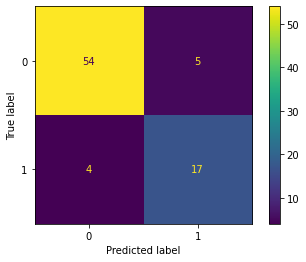

In [20]:


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc_1, X_test, y_test)  
plt.show()



In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.77      0.81      0.79        21

    accuracy                           0.89        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.89      0.89      0.89        80



**Visualising the Training set results**

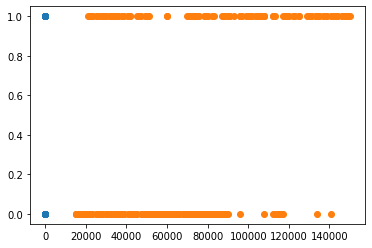

In [22]:
plt.plot(X_train,y_train,"o")

**Visualising the Test set results**

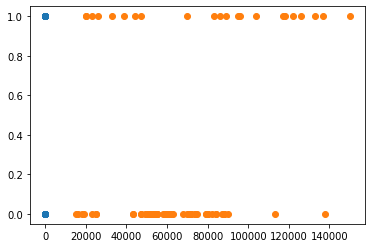

In [23]:
plt.plot(X_test,y_pred,"o")